In [3]:
import pandas as pd

In [3]:
df = pd.read_csv("/Users/arneshbanerjee/Coding/Hackathon/nasa2024/datasets/spkid.csv")

In [7]:
print(df)

            spkid
0        20000001
1        20000002
2        20000003
3        20000004
4        20000005
...           ...
1407839   1004026
1407840   1004024
1407841   1004025
1407842   1004027
1407843   1004028

[1407844 rows x 1 columns]


In [9]:
!pip install astropy

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import SkyCoord
import astropy.units as u

def fetch_horizons_data(start_time, stop_time, step_size='1d', des_id='1000165'):
    url = "https://ssd.jpl.nasa.gov/api/horizons.api"
    params = {
        'format': 'text',
        'COMMAND': f"'DES={des_id};'",
        'OBJ_DATA': 'YES',
        'MAKE_EPHEM': 'YES',
        'EPHEM_TYPE': 'OBSERVER',
        'CENTER': '500@399',
        'START_TIME': start_time,
        'STOP_TIME': stop_time,
        'STEP_SIZE': step_size,
        'QUANTITIES': '1'
    }
    response = requests.get(url, params=params)
    return response.text if response.status_code == 200 else None

def parse_horizons_data(data):
    lines = data.split('\n')
    start_idx = lines.index('$$SOE') + 1
    end_idx = lines.index('$$EOE')
    
    dates, ra, dec = [], [], []
    for line in lines[start_idx:end_idx]:
        parts = line.split()
        dates.append(parts[0])
        ra.append(' '.join(parts[2:5]))
        dec.append(' '.join(parts[5:8]))
    
    return dates, ra, dec

def plot_trajectory(dates, ra, dec, title="Asteroid Trajectory"):
    coords = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg))
    x = coords.cartesian.x.value
    y = coords.cartesian.y.value
    z = coords.cartesian.z.value

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    
    plt.show()

# List of IDs to check
ids = df['spkid']  # Add more IDs as needed

# DataFrame to store successful results
results_df = pd.DataFrame(columns=['ID', 'Date', 'RA', 'DEC'])

# Loop through the IDs and fetch data
for des_id in ids:
    data = fetch_horizons_data('2006-01-01', '2007-01-20', des_id=des_id)
    if data:
        try:
            dates, ra, dec = parse_horizons_data(data)
            temp_df = pd.DataFrame({'ID': des_id, 'Date': dates, 'RA': ra, 'DEC': dec})
            results_df = pd.concat([results_df, temp_df], ignore_index=True)
            print(f"Data fetched successfully for ID: {des_id}")
        except Exception as e:
            print(f"Error parsing data for ID: {des_id} - {e}")
    else:
        print(f"Failed to fetch data for ID: {des_id}")

# Display the results DataFrame
print(results_df)

# Optionally, plot the trajectory for one of the successful IDs
if not results_df.empty:
    sample_id = results_df['ID'].iloc[0]
    sample_data = results_df[results_df['ID'] == sample_id]
    plot_trajectory(sample_data['Date'], sample_data['RA'], sample_data['DEC'], title=f"Asteroid {sample_id} Trajectory")

Data fetched successfully for ID: 20000001
Data fetched successfully for ID: 20000002
Data fetched successfully for ID: 20000003
Data fetched successfully for ID: 20000004
Data fetched successfully for ID: 20000005
Data fetched successfully for ID: 20000006
Data fetched successfully for ID: 20000007
Data fetched successfully for ID: 20000008
Data fetched successfully for ID: 20000009
Data fetched successfully for ID: 20000010
Data fetched successfully for ID: 20000011
Data fetched successfully for ID: 20000012
Data fetched successfully for ID: 20000013
Data fetched successfully for ID: 20000014
Data fetched successfully for ID: 20000015
Data fetched successfully for ID: 20000016
Data fetched successfully for ID: 20000017
Data fetched successfully for ID: 20000018
Data fetched successfully for ID: 20000019
Data fetched successfully for ID: 20000020
Data fetched successfully for ID: 20000021
Data fetched successfully for ID: 20000022
Data fetched successfully for ID: 20000023
Data fetche

Data fetched successfully for ID: 20000001


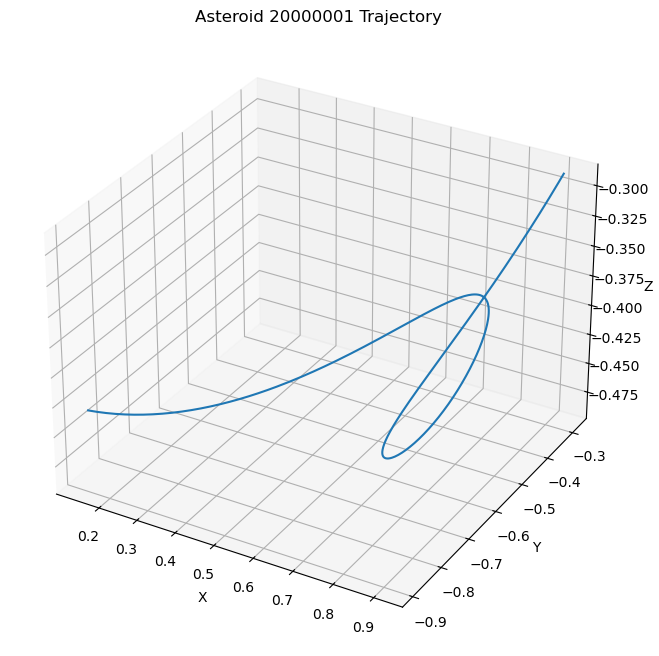

Data fetched successfully for ID: 20000002


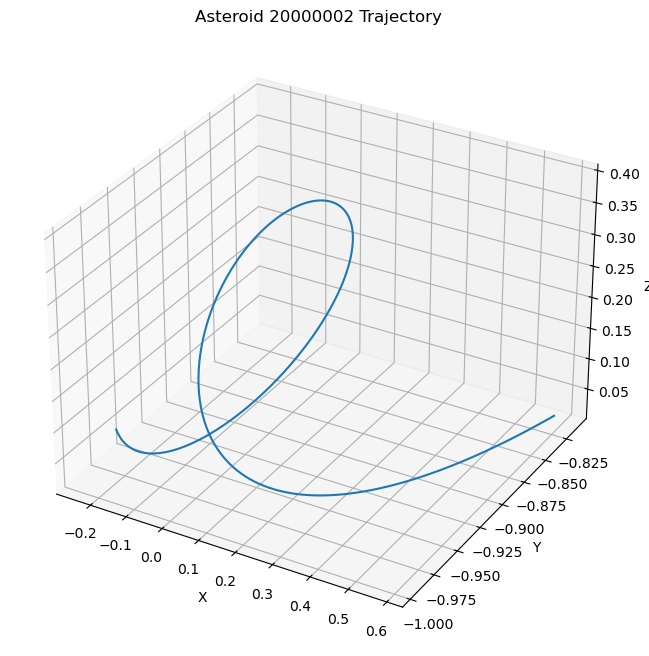

Data fetched successfully for ID: 20000003


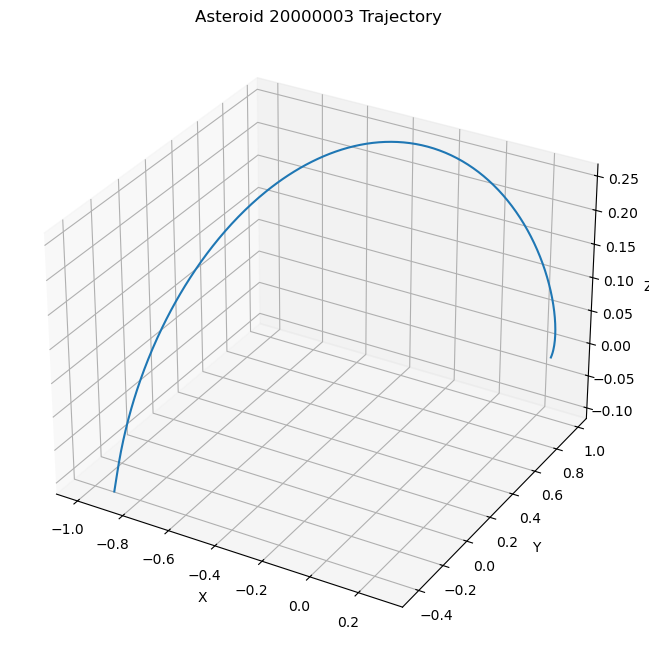

Data fetched successfully for ID: 20000004


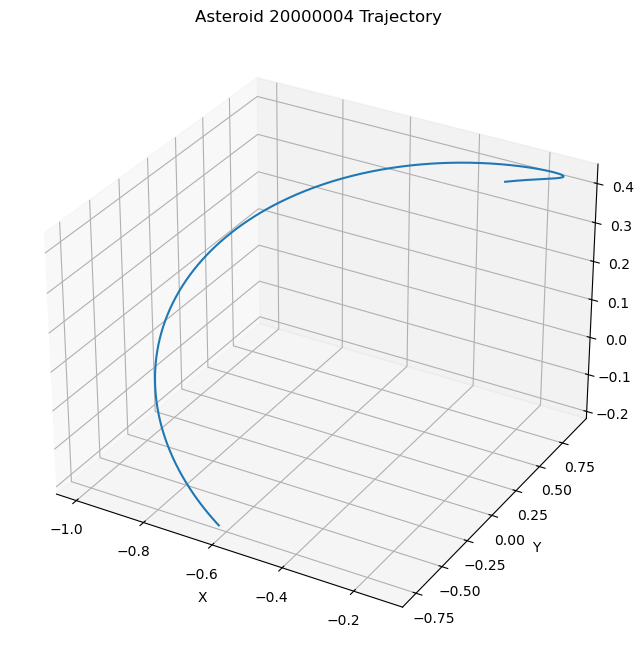

Data fetched successfully for ID: 20000005


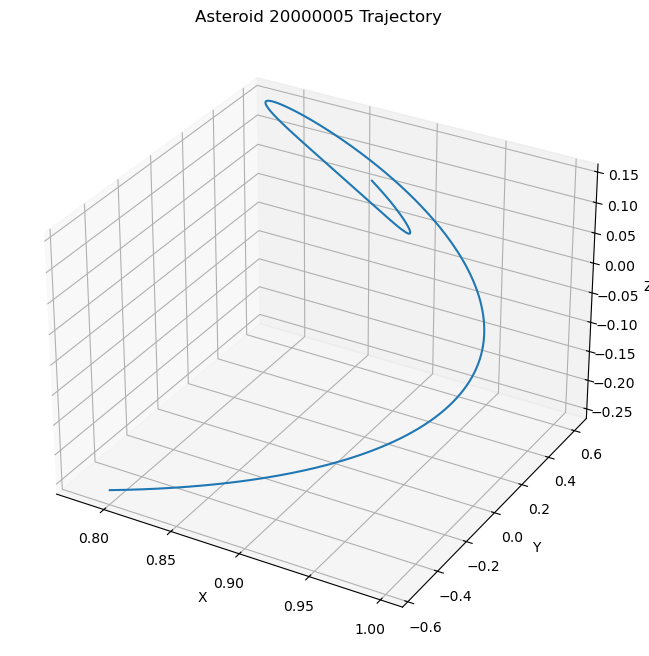

Data fetched successfully for ID: 20000006


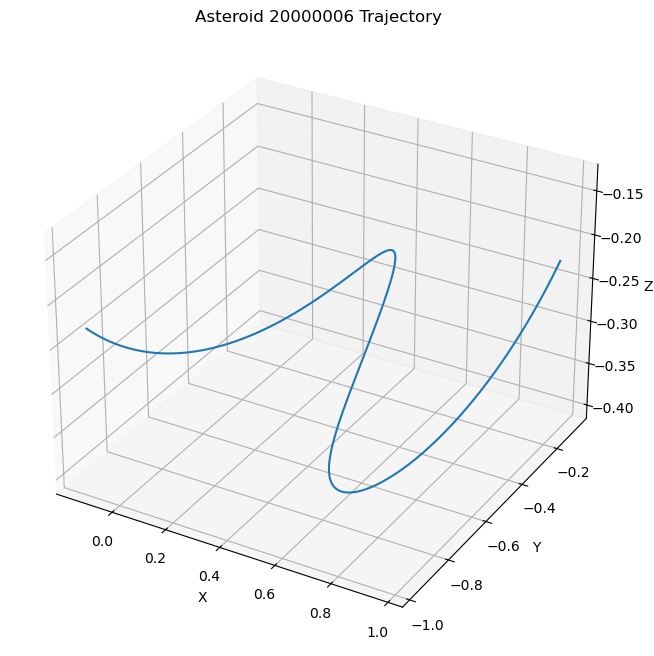

Data fetched successfully for ID: 20000007


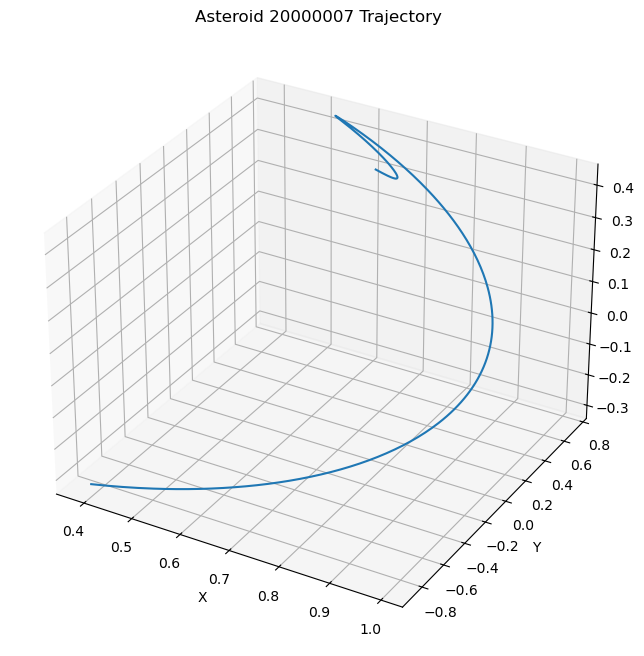

Data fetched successfully for ID: 20000008


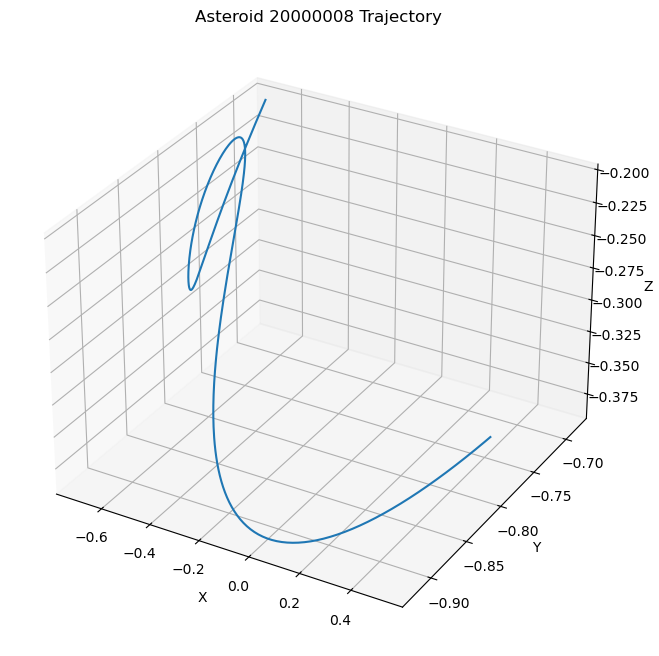

Data fetched successfully for ID: 20000009


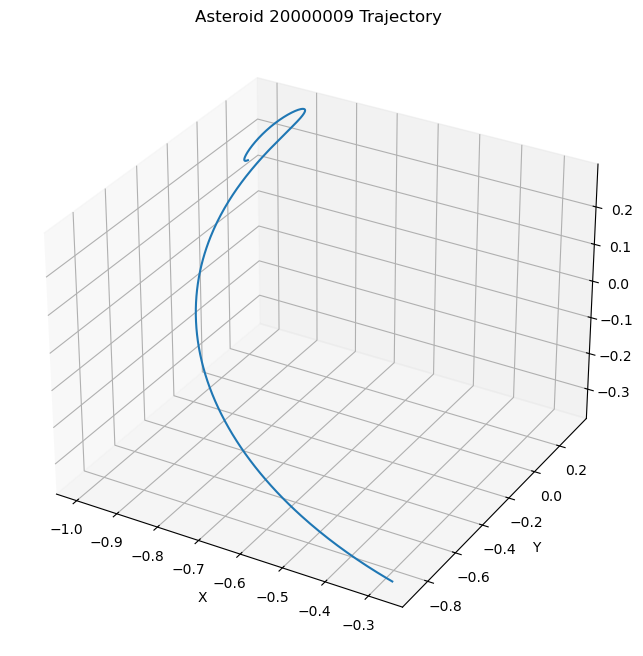

Data fetched successfully for ID: 20000010


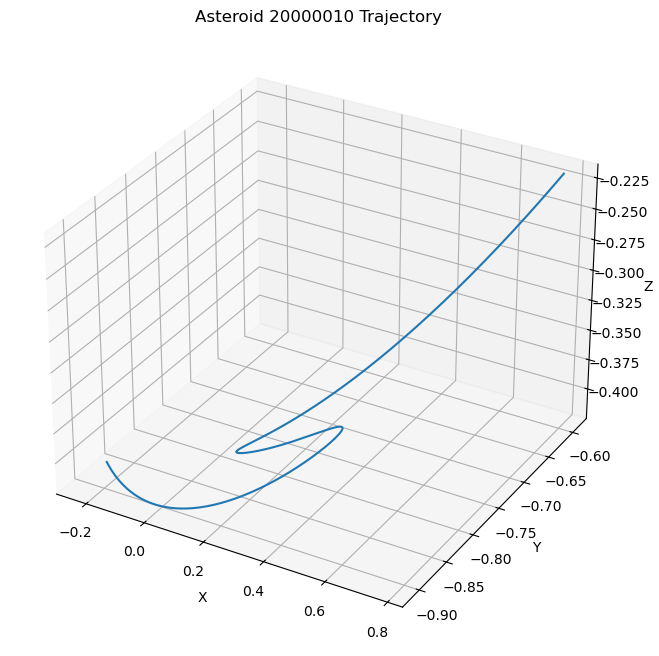

Data fetched successfully for ID: 20000011


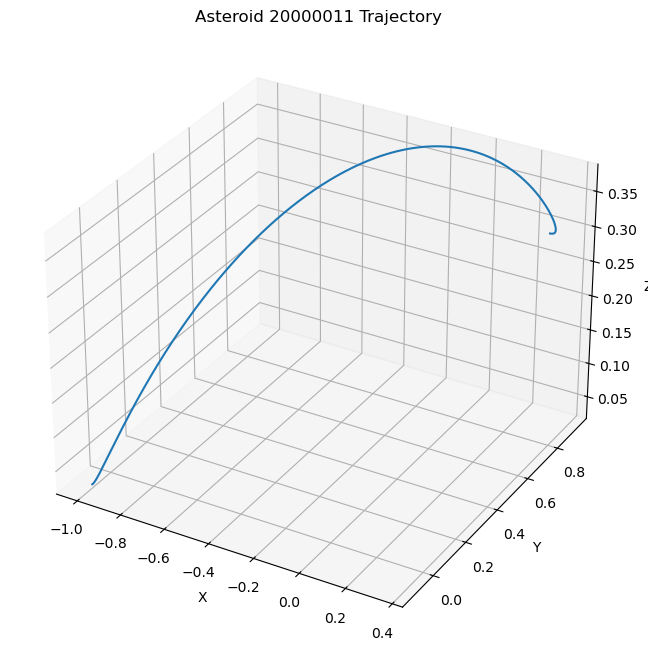

Data fetched successfully for ID: 20000012


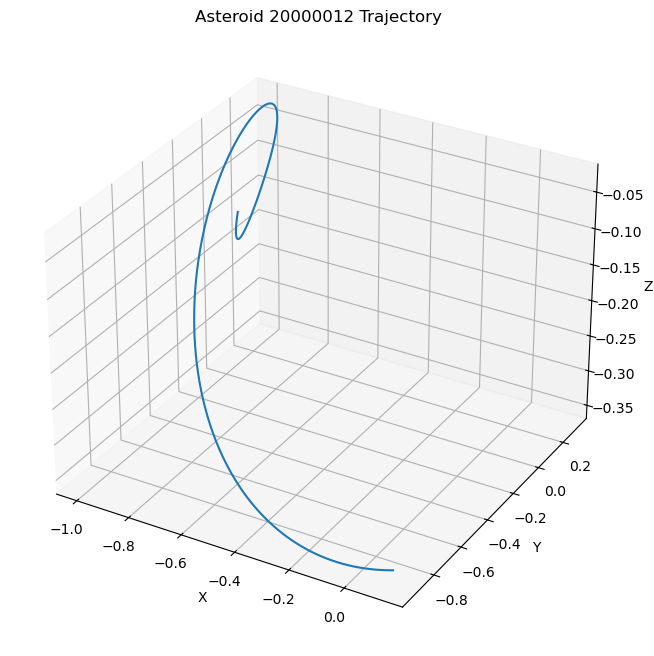

KeyboardInterrupt: 

In [5]:
import pandas as pd
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import SkyCoord
import astropy.units as u

def fetch_horizons_data(start_time, stop_time, step_size='1d', des_id='1000165'):
    url = "https://ssd.jpl.nasa.gov/api/horizons.api"
    params = {
        'format': 'text',
        'COMMAND': f"'DES={des_id};'",
        'OBJ_DATA': 'YES',
        'MAKE_EPHEM': 'YES',
        'EPHEM_TYPE': 'OBSERVER',
        'CENTER': '500@399',
        'START_TIME': start_time,
        'STOP_TIME': stop_time,
        'STEP_SIZE': step_size,
        'QUANTITIES': '1'
    }
    response = requests.get(url, params=params)
    return response.text if response.status_code == 200 else None

def parse_horizons_data(data):
    lines = data.split('\n')
    start_idx = lines.index('$$SOE') + 1
    end_idx = lines.index('$$EOE')
    
    dates, ra, dec = [], [], []
    for line in lines[start_idx:end_idx]:
        parts = line.split()
        dates.append(parts[0])
        ra.append(' '.join(parts[2:5]))
        dec.append(' '.join(parts[5:8]))
    
    return dates, ra, dec

def plot_trajectory(dates, ra, dec, title="Asteroid Trajectory"):
    coords = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg))
    x = coords.cartesian.x.value
    y = coords.cartesian.y.value
    z = coords.cartesian.z.value

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    
    plt.show()

# Assuming 'df' is defined and contains a 'spkid' column
# List of IDs to check
ids = df['spkid']  # Add more IDs as needed

# DataFrame to store successful results
results_df = pd.DataFrame(columns=['ID', 'Date', 'RA', 'DEC'])

# Loop through the IDs and fetch data
for des_id in ids:
    data = fetch_horizons_data('2006-01-01', '2007-01-20', des_id=des_id)
    if data:
        try:
            dates, ra, dec = parse_horizons_data(data)
            temp_df = pd.DataFrame({'ID': des_id, 'Date': dates, 'RA': ra, 'DEC': dec})
            results_df = pd.concat([results_df, temp_df], ignore_index=True)
            print(f"Data fetched successfully for ID: {des_id}")
            
            # Plot the trajectory for the current ID
            plot_trajectory(dates, ra, dec, title=f"Asteroid {des_id} Trajectory")
            
        except Exception as e:
            print(f"Error parsing data for ID: {des_id} - {e}")
    else:
        print(f"Failed to fetch data for ID: {des_id}")

# Display the results DataFrame
print(results_df)